# Old Car Price Prediction

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/car_price.csv')

In [3]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [4]:
df.shape

(5512, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [6]:
df.describe()

,Unnamed: 0,manufacture
count,5512.000000,5512.000000
mean,2755.500000,2015.455552
std,1591.321673,3.927974
min,0.000000,1995.000000
25%,1377.750000,2013.000000
50%,2755.500000,2016.000000
75%,4133.250000,2018.000000
max,5511.000000,2022.000000


In [7]:
df.isnull().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [8]:
df['engine'].value_counts()

engine
1197 cc    714
1248 cc    395
998 cc     346
1498 cc    252
1497 cc    245
          ... 
1173 cc      1
2359 cc      1
5950 cc      1
3956 cc      1
2979 cc      1
Name: count, Length: 139, dtype: int64

We have lots of values that could be numerical but are stored as strings. We will need to convert them to numerical values.

## Data processing

In [9]:
# Convert string prices to float
def convert_price_to_float(price_str):
    if ' Lakh' in price_str:
        price_str = price_str.replace(' Lakh', '')
        price_float = float(price_str) * 100000 # 1 lakh = 100 000 rupees
    elif ' Crore' in price_str:
        price_str = price_str.replace(' Crore', '')
        price_float = float(price_str) * 10000000 # 1 crore = 10 000 000 rupees
    else:
        price_str = price_str.replace(',', '.') # replace comma with dot (1,5 -> 1.5)
        price_float = float(price_str)
    return price_float

df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(convert_price_to_float)
df['car_prices_in_rupee']

0       1003000.0
1       1283000.0
2       1640000.0
3        777000.0
4        515000.0
          ...    
5507    2890000.0
5508    6490000.0
5509    1375000.0
5510    2990000.0
5511    3190000.0
Name: car_prices_in_rupee, Length: 5512, dtype: float64

In [10]:
# Convert kms_driven string to float
def convert_kms_to_float(km_str):
    km_str = re.sub(r'[a-zA-Z]', '', km_str)  # Remove alphabet
    km_str = km_str.replace(',', '')  # Remove comma
    return float(km_str)

df['kms_driven'] = df['kms_driven'].apply(convert_kms_to_float)
df['kms_driven']

0       86226.0
1       13248.0
2       60343.0
3       26696.0
4       69414.0
         ...   
5507    45000.0
5508    29000.0
5509    90000.0
5510    79000.0
5511    42000.0
Name: kms_driven, Length: 5512, dtype: float64

In [11]:
# Convert Seats string to int
def convert_seats_to_int(seats_str):
    seats_str = re.sub(r'[a-zA-Z]', '', seats_str)  # Remove alphabet
    return int(seats_str)

df['Seats'] = df['Seats'].apply(convert_seats_to_int)
df['Seats']

0       5
1       5
2       5
3       5
4       5
       ..
5507    7
5508    5
5509    5
5510    6
5511    5
Name: Seats, Length: 5512, dtype: int64

In [12]:
df.describe()

,Unnamed: 0,car_prices_in_rupee,kms_driven,manufacture,Seats
count,5512.000000,5.512000e+03,5512.000000,5512.000000,5512.000000
mean,2755.500000,1.160820e+06,63211.888062,2015.455552,5.250726
std,1591.321673,1.970881e+06,41844.131167,3.927974,0.720075
min,0.000000,3.500000e+01,250.000000,1995.000000,2.000000
25%,1377.750000,3.150000e+05,33151.750000,2013.000000,5.000000
50%,2755.500000,5.500000e+05,59000.000000,2016.000000,5.000000
75%,4133.250000,1.025750e+06,84265.250000,2018.000000,5.000000
max,5511.000000,1.920000e+07,560000.000000,2022.000000,8.000000


## EDA

C:\Users\jacqu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


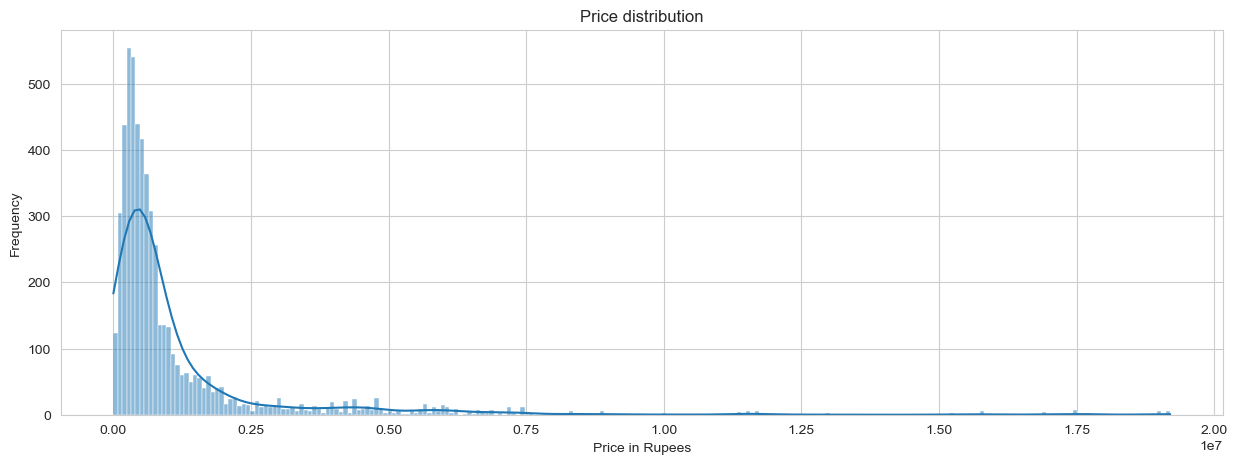

C:\Users\jacqu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


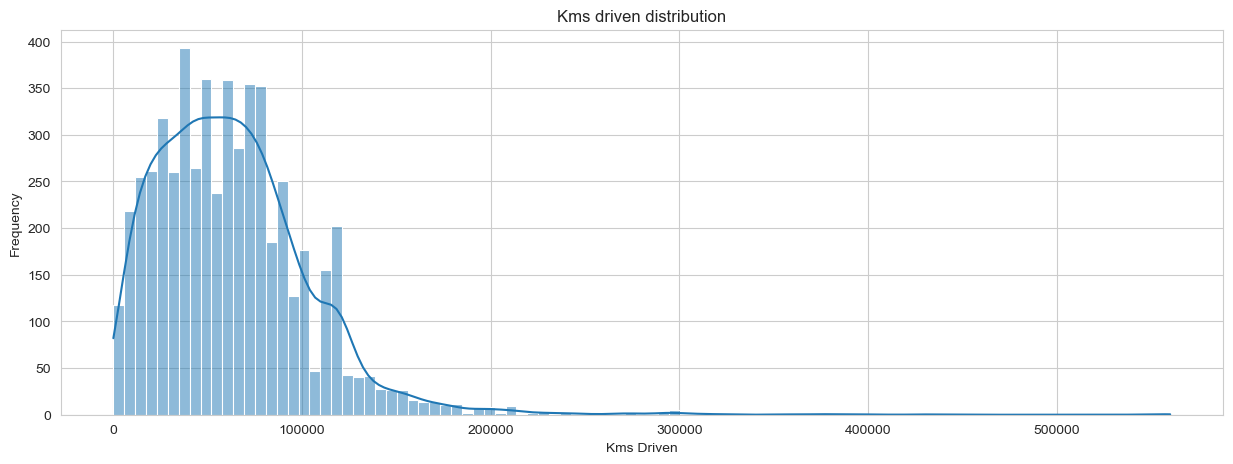

In [13]:
# Plot price distribution
plt.figure(figsize=(15, 5))
sns.histplot(df['car_prices_in_rupee'], kde=True)
plt.title('Price distribution')
plt.xlabel('Price in Rupees')
plt.ylabel('Frequency')
plt.show()

# Plot kms driven distribution
plt.figure(figsize=(15, 5))
sns.histplot(df['kms_driven'], kde=True)
plt.title('Kms driven distribution')
plt.xlabel('Kms Driven')
plt.ylabel('Frequency')
plt.show()

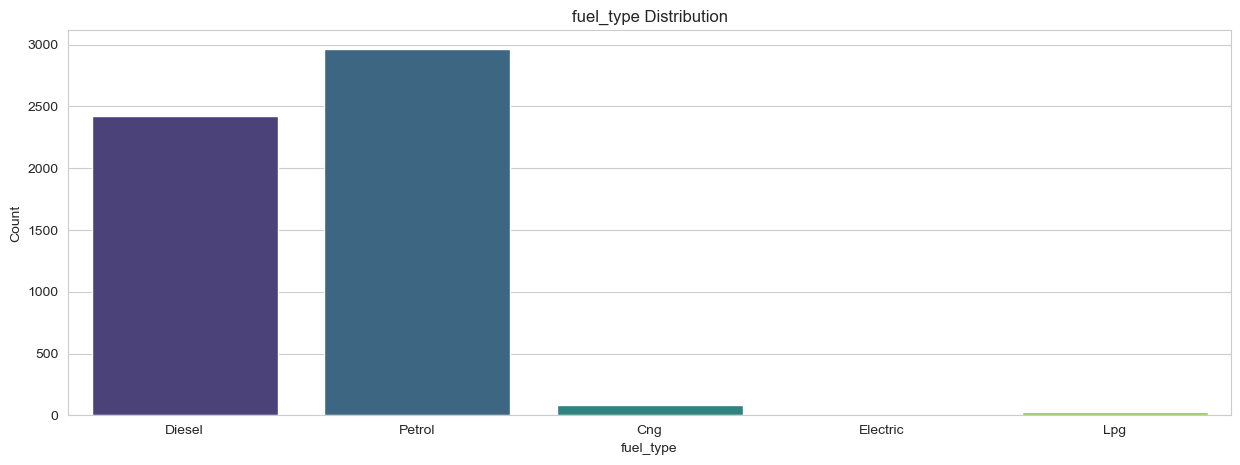

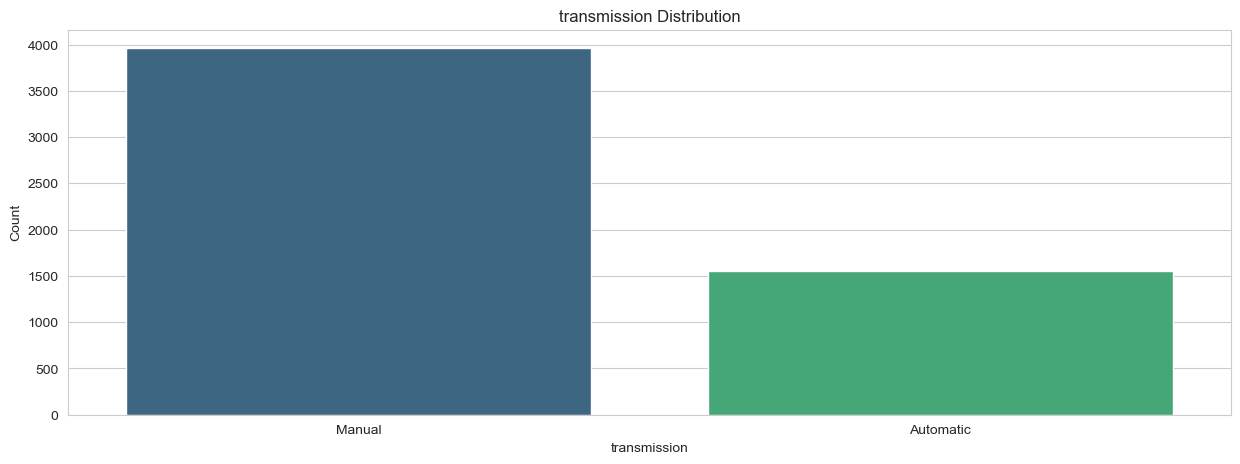

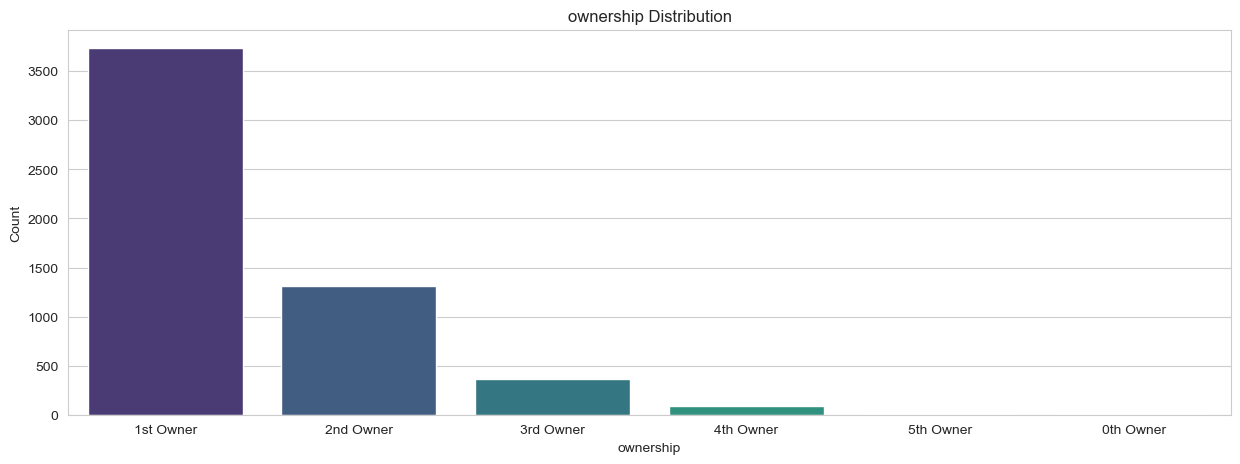

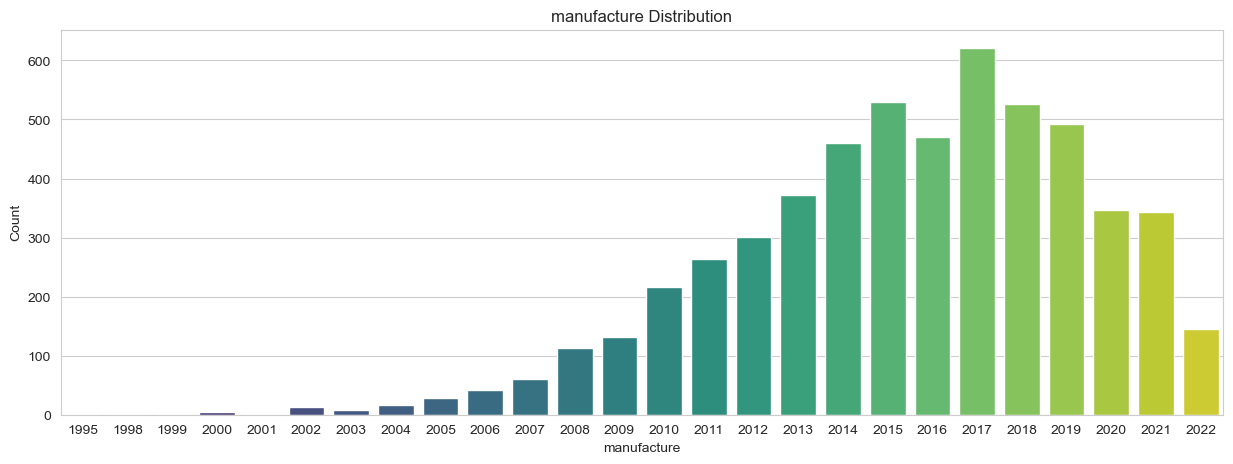

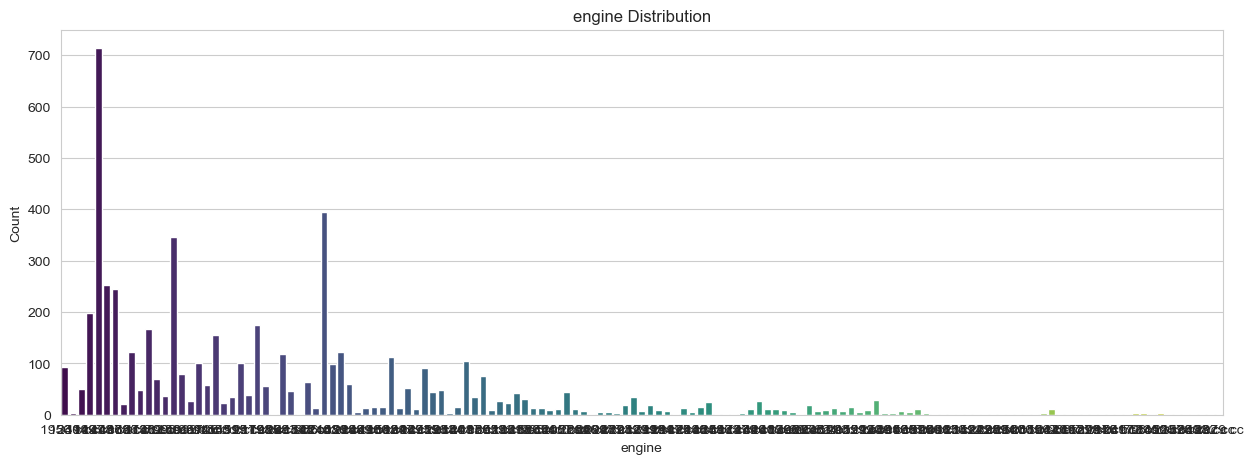

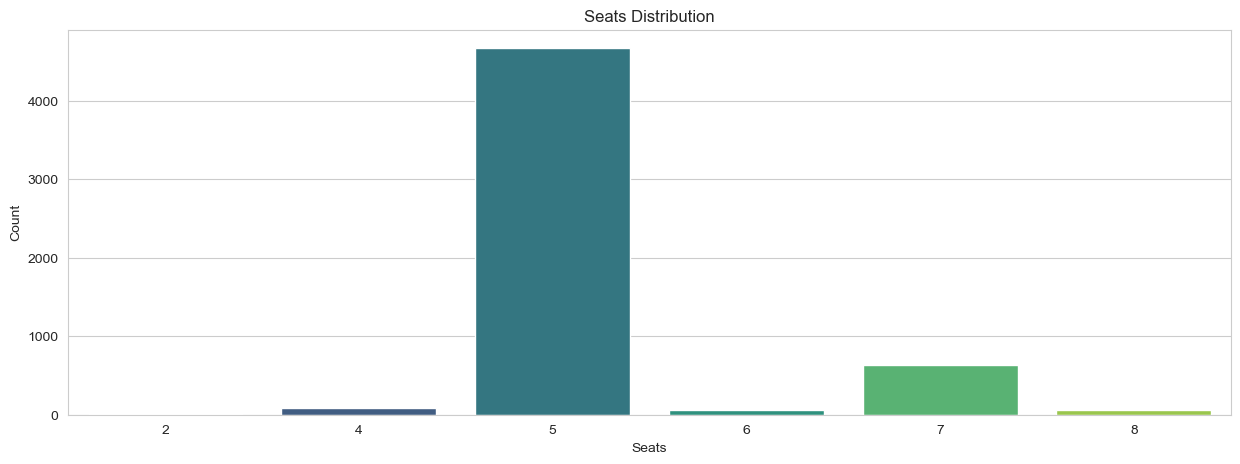

In [14]:
# Function to plot bar plot for categorical columns
def plot_categorical_distribution(df, column_name):
    plt.figure(figsize=(15, 5))
    sns.countplot(x=df[column_name], palette='viridis')
    plt.title(f'{column_name} Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()

# Plotting bar plots for each categorical column
categorical_columns = ['fuel_type', 'transmission', 'ownership', 'manufacture', 'engine', 'Seats']
for col in categorical_columns:
    plot_categorical_distribution(df, col)

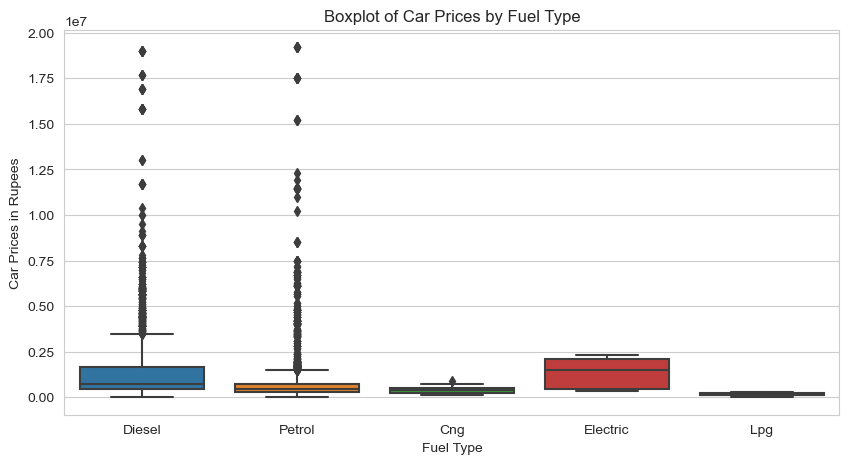

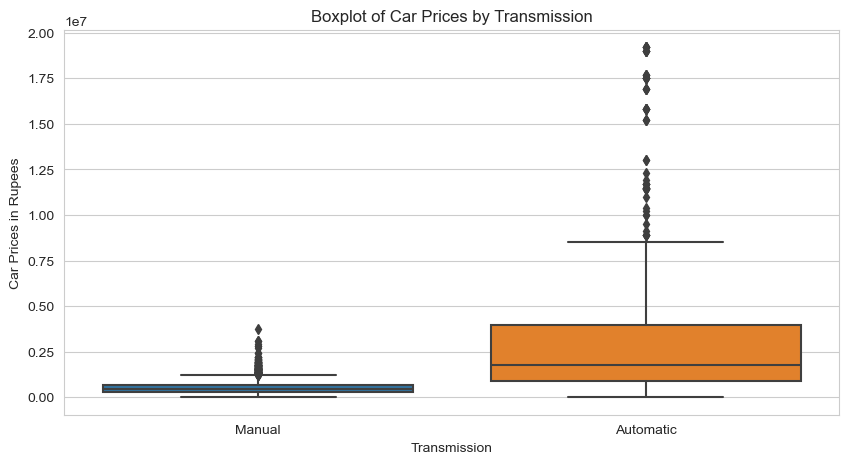

In [15]:
# Boxplots for numerical columns
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['fuel_type'], y=df['car_prices_in_rupee'])
plt.title('Boxplot of Car Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Car Prices in Rupees')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['transmission'], y=df['car_prices_in_rupee'])
plt.title('Boxplot of Car Prices by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Car Prices in Rupees')
plt.show()

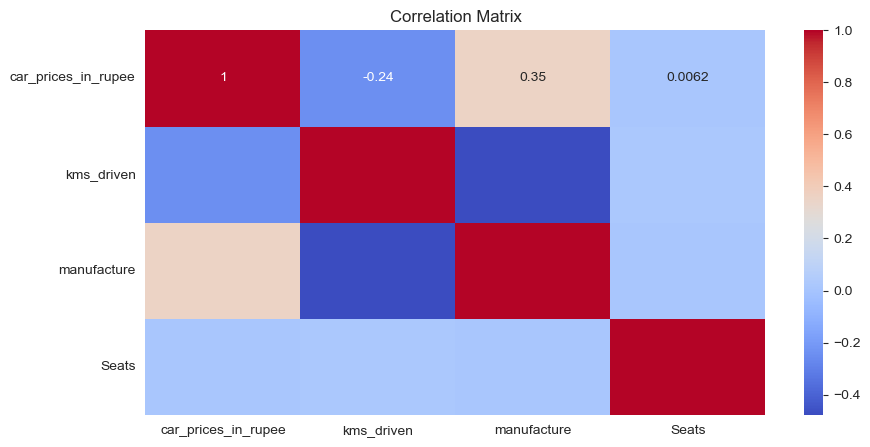

In [16]:
# Correlation matrix 
numerical_columns = ['car_prices_in_rupee', 'kms_driven', 'manufacture', 'Seats']
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()